# Introduction to Pandas

## 1. What is pandas?
### Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
## 2. Why is pandas so popular?
### Pandas is the *de facto* standard in data analysis and data manipulation in Python. In the backend it stores data as NumPy arrays, which in turns gives C-like performance whilst mantaining code simplicity.
## 3. Any drawback to be aware off?
### Pandas is very memory consuming, if a .csv file is X MB, you should expect pandas to take around 5-10 X memory in your RAM. This becomes a problem if you want to load several GB worth of data. Hence, scalability is not ideal and other technologies should be considered to ingest GB or TB sized data streams


# Pandas Series

## Pandas series are the simplest structure available in Pandas. They, describe a dataset labelled by a index and a single column. For instance, this could be a time-series of a stock price. 

### To create a DataFrame we use the method ```pd.Series()``` (https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

### One of the easyest ways to create a Series is using a dictionary. The keys of the dictionary will be transformed into indices and the values will be the corresponding values

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
my_series=pd.Series(data={"a":1,"b":2,"c":3})
my_series

a    1
b    2
c    3
dtype: int64

### One can create more complex series by feeding the index and data separately

In [15]:
import pandas as pd
import numpy as np
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,200)

df = pd.Series(data=stock_value, index=dates, name='stock_price')

print(df)
print(type(df))

2020-01-01    102.936131
2020-01-02     98.866562
2020-01-03     99.106670
2020-01-04    100.284866
2020-01-05     99.352014
                 ...    
2020-07-14     98.484689
2020-07-15     98.638934
2020-07-16     99.948266
2020-07-17     99.786892
2020-07-18     99.789603
Freq: D, Name: stock_price, Length: 200, dtype: float64
<class 'pandas.core.series.Series'>


### We can access the index attribute using the ```.index``` attribute and we can access the values using the ```.values``` attribute

In [16]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [17]:
df.values

array([102.93613059,  98.86656244,  99.10666968, 100.28486598,
        99.35201391, 100.38543684,  99.81954406,  98.86086247,
       100.04449847, 101.17934864,  99.01863882,  99.69859923,
       100.51099583, 100.0477825 , 100.31718909,  99.45293148,
       101.18954604,  98.90312399, 100.31047097, 100.33538201,
        99.69457036,  99.53129901, 100.1785994 , 100.5890529 ,
        98.63031995,  99.82472515, 100.80462682, 101.15039654,
       102.5774811 ,  98.70868494, 100.00798179, 102.0100692 ,
        99.2877168 , 100.48670894,  99.61293059, 100.61759284,
       102.21974879, 100.78935136, 100.06202944,  99.98544473,
        99.45061149, 101.98243671, 100.89442812, 100.98376442,
        99.85024964,  97.98261825, 100.89700334,  99.58299377,
        99.17368761, 100.34149415, 100.64508418, 100.5710881 ,
        99.33413902, 100.47443192,  98.8104166 ,  98.66477453,
       101.78862865, 101.70346576,  99.17529705, 101.39182354,
        98.15304352,  97.91486399,  99.97101528, 100.26

### To access elements of the series, we can use slicing similar to numpy arrays and lists. The big difference is that we need to use the index keys to access elements or ranges

In [18]:
print(df[::2])#valid
print("----------------")
print(df[:-10])
print("----------------")
print(df[1:-10])

2020-01-01    102.936131
2020-01-03     99.106670
2020-01-05     99.352014
2020-01-07     99.819544
2020-01-09    100.044498
                 ...    
2020-07-09     99.536592
2020-07-11     99.731679
2020-07-13    100.652302
2020-07-15     98.638934
2020-07-17     99.786892
Freq: 2D, Name: stock_price, Length: 100, dtype: float64
----------------
2020-01-01    102.936131
2020-01-02     98.866562
2020-01-03     99.106670
2020-01-04    100.284866
2020-01-05     99.352014
                 ...    
2020-07-04     98.735472
2020-07-05     98.637424
2020-07-06    101.481809
2020-07-07     97.381497
2020-07-08     99.522313
Freq: D, Name: stock_price, Length: 190, dtype: float64
----------------
2020-01-02     98.866562
2020-01-03     99.106670
2020-01-04    100.284866
2020-01-05     99.352014
2020-01-06    100.385437
                 ...    
2020-07-04     98.735472
2020-07-05     98.637424
2020-07-06    101.481809
2020-07-07     97.381497
2020-07-08     99.522313
Freq: D, Name: stock_price, 

### We can also range with dates, since they are the index

In [19]:
df['2020-01-01':'2020-04-03']

2020-01-01    102.936131
2020-01-02     98.866562
2020-01-03     99.106670
2020-01-04    100.284866
2020-01-05     99.352014
                 ...    
2020-03-30    100.542585
2020-03-31     99.891228
2020-04-01    100.114475
2020-04-02     99.823927
2020-04-03     99.807911
Freq: D, Name: stock_price, Length: 94, dtype: float64

### If we want to access scalar values we either use the correct index or the ```.at[index]``` method. The following are equivalent

In [20]:
%timeit df.at['2020-01-01']

12.7 µs ± 65.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
%timeit df['2020-01-01']

11.7 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
print(df['2020-01-01'])
print(df.at['2020-01-01'])

102.93613059408688
102.93613059408688


### If we want to access slices we can also use the  ```.loc[array_index]``` method. The following are equivalent

In [23]:
print(df.loc[['2020-01-01','2020-01-03']])
print(df[['2020-01-01','2020-01-03']])

2020-01-01    102.936131
2020-01-03     99.106670
Name: stock_price, dtype: float64
2020-01-01    102.936131
2020-01-03     99.106670
Name: stock_price, dtype: float64


### **Note**: Indexes can be any array of objects in python, ordered or not. See examples below

In [24]:
# We create a index with a integer list
my_index=[3,2,1]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df1 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df1)
print(type(df1))
df1.index

3    100.808136
2     98.580366
1     99.243460
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index([3, 2, 1], dtype='int64')

In [25]:
# We create a index with a integer list
my_index=["Jan","Feb","Mar"]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df2 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df2)
print(type(df2))
df2.index

Jan     99.328419
Feb    100.029950
Mar     98.648525
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index(['Jan', 'Feb', 'Mar'], dtype='object')

###  Pandas series offer a number of functionalities, like plotting the data in a very straightforward manner (for more info visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

<Axes: title={'center': 'Stock value'}>

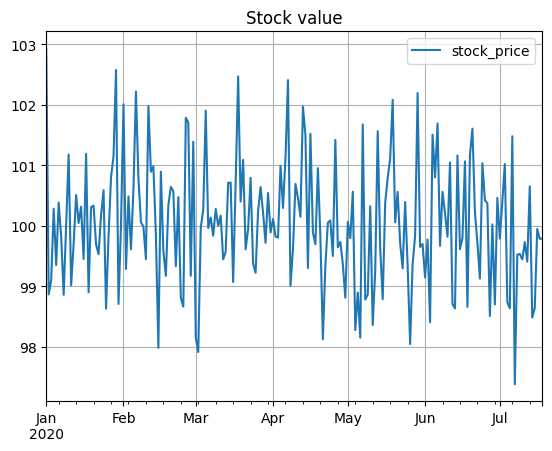

In [26]:
df.plot(title="Stock value",grid=True,legend=True)

### Another useful feature is to be able to display summary statistics of our data set using the ```.describe()```class method

In [27]:
df.describe()

count    200.000000
mean     100.044927
std        1.019459
min       97.381497
25%       99.374203
50%       99.978230
75%      100.646889
max      102.936131
Name: stock_price, dtype: float64

In [28]:
df.describe()["std"]

np.float64(1.0194593243524719)

### **Note:** the desribe method returns a series as well

In [29]:
type(df.describe())

pandas.core.series.Series

### We can also display first/last n rows using ```head(n)``` or ```tail(n)``` that also return series

In [30]:
df.head(5)

2020-01-01    102.936131
2020-01-02     98.866562
2020-01-03     99.106670
2020-01-04    100.284866
2020-01-05     99.352014
Freq: D, Name: stock_price, dtype: float64

In [31]:
type(df.head(5))

pandas.core.series.Series

In [32]:
df.tail(2)

2020-07-17    99.786892
2020-07-18    99.789603
Freq: D, Name: stock_price, dtype: float64

### **Note** that ```head(n)``` or ```tail(n)``` are equivalent to slicing with ```[:n]``` or ```[-n:]``` respectively

---
# Pandas DataFrames
### Before advancing further, let's introduce the concept of a dataframe. A Pandas DataFrame is a collection of Series labelled by the same index, e.g. it could be a collection of Series of Stock prices labelled by their timestamp. 

### To create a DataFrame we use the method ```pd.DataFrame()``` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


In [33]:
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,(200,4))

df = pd.DataFrame(stock_value, index=dates, columns=['stock_a','stock_b','stock_c','stock_d'])

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,stock_a,stock_b,stock_c,stock_d
2020-01-01,99.443273,99.445714,99.899907,98.327587
2020-01-02,100.278004,99.565306,100.990471,99.233739
2020-01-03,100.761177,99.464816,98.105441,101.225972
2020-01-04,100.058590,99.330523,100.455057,101.893392
2020-01-05,99.339350,100.456083,99.107339,99.636280
...,...,...,...,...
2020-07-14,101.250067,101.412599,99.851613,99.107266
2020-07-15,100.829629,100.414301,101.542002,101.780862
2020-07-16,98.793849,98.886144,98.902372,100.181260
2020-07-17,97.889131,99.460071,99.502144,99.851241


### Let's have a look at some examples looking at the```yfinance``` library
#### In 2025 the YFinance API changed a bit so we need to modify the pandas dataframe that gets returned from the library to be a bit more firendly

In [130]:
import yfinance

AAPL = yfinance.download(["AAPL"],auto_adjust=False,period="5Y" ) # gets Apple's data

[*********************100%***********************]  1 of 1 completed


In [128]:
AAPL.columns.get_level_values('Price')

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [131]:
AAPL.columns=AAPL.columns.swaplevel(0, 1)

AAPL.loc[:,('AAPL')]

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890060,108.860001,111.989998,107.720001,111.059998,190272600
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100
...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200


In [132]:
#Option 2
AAPL = yfinance.download(["AAPL"],auto_adjust=False,period="5Y")
AAPL=pd.DataFrame(AAPL.values,AAPL.index,columns=AAPL.columns.get_level_values('Price').values)

[*********************100%***********************]  1 of 1 completed


In [133]:
AAPL

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890060,108.860001,111.989998,107.720001,111.059998,190272600.0
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0


In [134]:
type(AAPL) # Check data typr

pandas.core.frame.DataFrame

### As mentioned, before ```yfinance``` provides us with a dataframe directly with a number of columns, that can then be accessed by typing ```dataframe.columns```, and likewise for the index, which can be accessed using  ```dataframe.index```. The values in turn, can be accessed using the attribute ```dataframe.vales```

In [135]:
AAPL.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [136]:
AAPL.index


DatetimeIndex(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12',
               ...
               '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21',
               '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-27',
               '2025-10-28', '2025-10-29'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

In [137]:
AAPL.values

array([[1.05890060e+02, 1.08860001e+02, 1.11989998e+02, 1.07720001e+02,
        1.11059998e+02, 1.90272600e+08],
       [1.05802498e+02, 1.08769997e+02, 1.10680000e+02, 1.07320000e+02,
        1.09110001e+02, 1.22866900e+08],
       [1.07426971e+02, 1.10440002e+02, 1.11489998e+02, 1.08730003e+02,
        1.09660004e+02, 1.07624400e+08],
       ...,
       [2.68809998e+02, 2.68809998e+02, 2.69119995e+02, 2.64649994e+02,
        2.64880005e+02, 4.48882000e+07],
       [2.69000000e+02, 2.69000000e+02, 2.69890015e+02, 2.68149994e+02,
        2.68989990e+02, 4.15348000e+07],
       [2.69700012e+02, 2.69700012e+02, 2.71410004e+02, 2.67109985e+02,
        2.69279999e+02, 5.09840000e+07]], shape=(1255, 6))

### ***Remark***: ```.values ``` casts a dataframe or series into a numpy array. Note that this operation will return a pure numpy array without the original index

---
# Quick comment on storing and loading dataframes
### Pandas offers a number of format compatibility like ```dataframe.to_csv``` .csv,  ```dataframe.to_pickle``` .pickle etc. The difference between picke and csv is that with pickle python will repect the types of index/values as opposed to csv where it will do a best guess

In [138]:
AAPL.to_csv('AAPL.csv',index=True)
pd.read_csv('AAPL.csv',index_col=0)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890060,108.860001,111.989998,107.720001,111.059998,190272600.0
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0


### Note that we lost the type of the index

In [139]:
pd.read_csv('AAPL.csv',index_col=0).index

Index(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
       '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       ...
       '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21', '2025-10-22',
       '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29'],
      dtype='object', name='Date', length=1255)

In [140]:
AAPL.to_pickle('AAPL.pickle')
pd.read_pickle('AAPL.pickle')

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890060,108.860001,111.989998,107.720001,111.059998,190272600.0
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0


In [141]:
pd.read_pickle('AAPL.pickle').index

DatetimeIndex(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12',
               ...
               '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21',
               '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-27',
               '2025-10-28', '2025-10-29'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

### Here pickle respects the original index type

---
# Back to DataFrames

## Slicing DataFrames

### Perhaps, not all the information in a dataframe is relevant to us and often case we want to either remove part of it or transform it. Let us start by selecting a single column from the dataframe above. There are a numbers of ways to do this operation:

In [142]:
# Let's assume we are interested in adjclose column in AAPL dataframe
AAPL_close=AAPL.Close # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-10-30    108.860001
2020-11-02    108.769997
2020-11-03    110.440002
2020-11-04    114.949997
2020-11-05    119.029999
                 ...    
2025-10-23    259.579987
2025-10-24    262.820007
2025-10-27    268.809998
2025-10-28    269.000000
2025-10-29    269.700012
Name: Close, Length: 1255, dtype: float64

In [143]:
# Equivalently we can use 
AAPL_close=AAPL['Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-10-30    108.860001
2020-11-02    108.769997
2020-11-03    110.440002
2020-11-04    114.949997
2020-11-05    119.029999
                 ...    
2025-10-23    259.579987
2025-10-24    262.820007
2025-10-27    268.809998
2025-10-28    269.000000
2025-10-29    269.700012
Name: Close, Length: 1255, dtype: float64

### We can also use the loc method, as opposed to series, for dataframes ```.loc``` takes two arguments ```.loc[array_index,array_columns]```

In [144]:
# Equivalently we can use 
AAPL_close=AAPL.loc[:,'Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-10-30    108.860001
2020-11-02    108.769997
2020-11-03    110.440002
2020-11-04    114.949997
2020-11-05    119.029999
                 ...    
2025-10-23    259.579987
2025-10-24    262.820007
2025-10-27    268.809998
2025-10-28    269.000000
2025-10-29    269.700012
Name: Close, Length: 1255, dtype: float64

### ***Remark***:  Slicing a dataframe into a single column returns  a Series! Slicing multiple Columns return a DataFrame!

### If we want to obtain a DataFrame as output we can use double brackets with the columns (see below)

In [145]:
AAPL_close=AAPL.loc[:,['Close']]
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2020-10-30,108.860001
2020-11-02,108.769997
2020-11-03,110.440002
2020-11-04,114.949997
2020-11-05,119.029999
...,...
2025-10-23,259.579987
2025-10-24,262.820007
2025-10-27,268.809998


In [146]:
AAPL[['Close']]

,Close
Date,
2020-10-30,108.860001
2020-11-02,108.769997
2020-11-03,110.440002
2020-11-04,114.949997
2020-11-05,119.029999
...,...
2025-10-23,259.579987
2025-10-24,262.820007
2025-10-27,268.809998


In [147]:
#Let's slice high and low
AAPL_high_low=AAPL.loc[:,['Low','High']]
print(type(AAPL_high_low))
AAPL_high_low

<class 'pandas.core.frame.DataFrame'>


,Low,High
Date,,
2020-10-30,107.720001,111.989998
2020-11-02,107.320000,110.680000
2020-11-03,108.730003,111.489998
2020-11-04,112.349998,115.589996
2020-11-05,116.870003,119.620003
...,...,...
2025-10-23,258.010010,260.619995
2025-10-24,259.179993,264.130005
2025-10-27,264.649994,269.119995


## Slicing using integer indexing

### Sometimes we might not care about the specific name that a column has or the especific indexing convention e.g. we might just be interest in the 1st value of the 1st column. We can use the ```.iloc``` (integer locator) method to access such elements using the convention ```.iloc[array_integer_index,array_integer_columns]``` same **as if we where slicing a 2D numpy array**

In [148]:
AAPL.iloc[:,2]# all rows only 3rd column

Date
2020-10-30    111.989998
2020-11-02    110.680000
2020-11-03    111.489998
2020-11-04    115.589996
2020-11-05    119.620003
                 ...    
2025-10-23    260.619995
2025-10-24    264.130005
2025-10-27    269.119995
2025-10-28    269.890015
2025-10-29    271.410004
Name: High, Length: 1255, dtype: float64

In [149]:
AAPL.iloc[2,:]# 3rd row all columns

Adj Close    1.074270e+02
Close        1.104400e+02
High         1.114900e+02
Low          1.087300e+02
Open         1.096600e+02
Volume       1.076244e+08
Name: 2020-11-03 00:00:00, dtype: float64

In [150]:
AAPL.iloc[2:4,2:4]# 3-4 rows and 3-4 columns

,High,Low
Date,,
2020-11-03,111.489998,108.730003
2020-11-04,115.589996,112.349998


---
# ```.loc``` vs ```.at```  | ```.iloc``` vs ```.iat```

### What is the difference between ```.loc``` and ```.at```? ```loc``` returns either a scalar value or an array, whereas ```at``` only works for scalar retrieval

### What is the difference between ```.iloc``` and ```.iat```? ```iloc``` returns either a scalar value or an array, whereas ```iat``` only works for scalar retrieval

In [151]:
AAPL.loc[:,"Close"]

Date
2020-10-30    108.860001
2020-11-02    108.769997
2020-11-03    110.440002
2020-11-04    114.949997
2020-11-05    119.029999
                 ...    
2025-10-23    259.579987
2025-10-24    262.820007
2025-10-27    268.809998
2025-10-28    269.000000
2025-10-29    269.700012
Name: Close, Length: 1255, dtype: float64

In [152]:
AAPL.at[:,"Close"]#Not allowed because it returns an array

InvalidIndexError: slice(None, None, None)

In [153]:
%timeit AAPL.at["2023-10-30","Close"]

12.7 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [154]:
%timeit AAPL.loc["2023-10-30","Close"]

49.1 µs ± 974 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### **Note**: ```iat``` and ```at``` are much more performant for scalar value retrieval 

---
# Creating new columns
### To create new columns we simply write the name of the new column in square brackets ```DataFrame["new_column_name"]=values``` and assign a value e.g

In [155]:
AAPL["log_stock_close"]=np.log(AAPL.Close)

In [156]:
AAPL.head(5)

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-10-30,105.890060,108.860001,111.989998,107.720001,111.059998,190272600.0,4.690063
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0,4.689236
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,4.704472
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0,4.744497
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0,4.779376


### Note that we need to assign an array with the same length otherwise it will throw an error:

In [157]:
AAPL['log_stock_close']=np.array([1,2]) #Not valid

ValueError: Length of values (2) does not match length of index (1255)

# Some useful functions
### Pandas provides mean, std,sum,min,max... and a number of functions that can be applied to both axis, similar to numpy

In [158]:
AAPL.mean(axis=0) #mean across columns

Adj Close          1.743918e+02
Close              1.763107e+02
High               1.780590e+02
Low                1.743722e+02
Open               1.761305e+02
Volume             7.194879e+07
log_stock_close    5.150982e+00
dtype: float64

In [159]:
AAPL.std(axis=0) #std across columns

Adj Close          3.746623e+01
Close              3.663378e+01
High               3.681748e+01
Low                3.634750e+01
Open               3.656428e+01
Volume             3.078490e+07
log_stock_close    2.059822e-01
dtype: float64

In [160]:
AAPL.sum(axis=0) #sum across columns

Adj Close          2.188616e+05
Close              2.212700e+05
High               2.234640e+05
Low                2.188371e+05
Open               2.210438e+05
Volume             9.029573e+10
log_stock_close    6.464483e+03
dtype: float64

In [161]:
AAPL.min(axis=0) #minimum value across columns

Adj Close          1.058025e+02
Close              1.087700e+02
High               1.106800e+02
Low                1.073200e+02
Open               1.091100e+02
Volume             2.323470e+07
log_stock_close    4.689236e+00
dtype: float64

In [162]:
AAPL.max(axis=0) #minimum value across columns

Adj Close          2.697000e+02
Close              2.697000e+02
High               2.714100e+02
Low                2.681500e+02
Open               2.692800e+02
Volume             3.186799e+08
log_stock_close    5.597310e+00
dtype: float64

---
# Boolean slicing

### We can also slice a dataframe whenever a boolean condition is satisfied. To do so we can use the ```.loc[boolean_array,columns_array]``` method 

In [163]:
# Filter data by volume
boolean_condition=AAPL.Volume>400000000
print(boolean_condition)
AAPL.loc[boolean_condition,:]

Date
2020-10-30    False
2020-11-02    False
2020-11-03    False
2020-11-04    False
2020-11-05    False
              ...  
2025-10-23    False
2025-10-24    False
2025-10-27    False
2025-10-28    False
2025-10-29    False
Name: Volume, Length: 1255, dtype: bool


,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,


---
# Chaining multiple boolean conditions with the keyword ```&```

### If we want to concatenate mutiple condition we need to use the **bitwise and** operator defined by ```&```
### If we want to concatenate mutiple alternative condition we need to use the **bitwise or** operator defined by ```|```

In [169]:
# Filter data by volume
boolean_condition1=AAPL.Volume>4000000
boolean_condition2=AAPL.Volume<90000000

AAPL.loc[boolean_condition1 & boolean_condition2,:]

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-13,116.206474,119.260002,119.669998,117.870003,119.440002,81581900.0,4.781306
2020-11-17,116.333138,119.389999,120.669998,118.959999,119.550003,74271000.0,4.782395
2020-11-18,115.007965,118.029999,119.820000,118.000000,118.610001,76322100.0,4.770939
2020-11-19,115.602333,118.639999,119.059998,116.809998,117.589996,74113000.0,4.776094
2020-11-20,114.335617,117.339996,118.769997,117.290001,118.639999,73604300.0,4.765076
...,...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0,5.559065
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0,5.571469
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0,5.594005


---
# DataFrames and mutability (from the official documentation (https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

### All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.


### What is important is to keep in mind that the backend of DataFrames are numpy arrays and the rules for mutability apply similarly. Let's see some examples:

In [182]:
df2=AAPL
print(AAPL.iloc[0,0])
df2.iloc[0,0]=0
print(AAPL.iloc[0,0])

105.89006042480469
0.0


In [183]:
df2

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-10-30,0.000000,108.860001,111.989998,107.720001,111.059998,190272600.0,4.690063
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0,4.689236
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,4.704472
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0,4.744497
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0,4.779376
...,...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0,5.559065
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0,5.571469
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0,5.594005


In [184]:
AAPL

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-10-30,0.000000,108.860001,111.989998,107.720001,111.059998,190272600.0,4.690063
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0,4.689236
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,4.704472
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0,4.744497
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0,4.779376
...,...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0,5.559065
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0,5.571469
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0,5.594005


In [185]:
#Exactly the same problem as arrays
a=np.array([1,2,3])
b=a
b[0]=10
print(a[0])

10


### As you can see copies of dataframes are mutable in the value, so one needs to be careful when making copies and modifying them as it also changes the root values. You can sort this out, by using the  ```.copy() ``` method

In [186]:
df2=AAPL.copy()
print(AAPL.iloc[1,0])
df2.iloc[1,0]=0
print(AAPL.iloc[1,0])

105.80249786376953
105.80249786376953


In [187]:
AAPL.index[0]="1980-11-11"

TypeError: Index does not support mutable operations

### Indices on the other hand, are inmutable. This means that if we want to make a change to the index we need to redefine the entire index
---

# Describe and plot()
### Similar to pandas Series we can use describe and plot methods on DataFames

In [188]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1255.000000
mean,174.307377,176.310741,178.058996,174.372191,176.130494,7.194879e+07,5.150982
std,37.738862,36.633780,36.817480,36.347501,36.564283,3.078490e+07,0.205982
min,0.000000,108.769997,110.680000,107.320000,109.110001,2.323470e+07,4.689236
25%,144.073166,146.849998,148.535004,145.525002,146.875000,4.944410e+07,4.989412
50%,169.639801,172.169998,173.630005,170.509995,171.759995,6.513600e+07,5.148482
75%,201.301544,201.529999,203.955002,199.949997,201.875000,8.744275e+07,5.305938
max,269.700012,269.700012,271.410004,268.149994,269.279999,3.186799e+08,5.597310


<Axes: title={'center': 'AAPL daily OHLCV'}, xlabel='Date'>

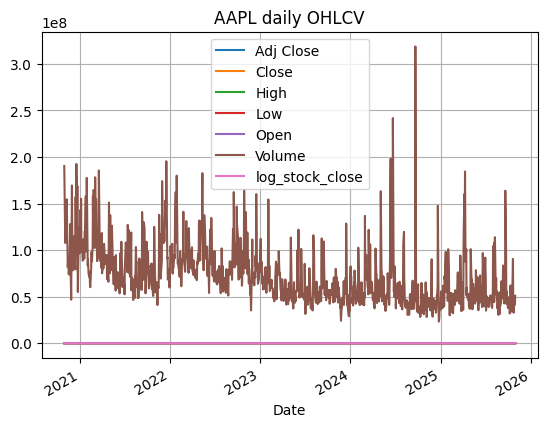

In [189]:
#AAPL_high_low=AAPL.loc[dates_2019,['low','high']]
#print(type(AAPL_high_low))
#Plot the data
AAPL.plot(grid=True,title='AAPL daily OHLCV')

### The scale of the different columns is an issues here, but we can select the columns that we care about to make a cleaner plot

<Axes: title={'center': 'AAPL daily OHLC'}, xlabel='Date'>

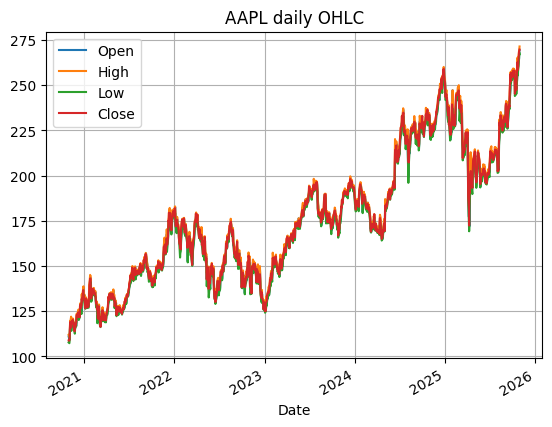

In [190]:
AAPL[["Open","High","Low","Close"]].plot(grid=True,title='AAPL daily OHLC')

###  We will see more on plotting later, but this gives a simple tool to visualize quickly a dataset
---

# Dates and Time slicing

### The python standard library includes ```datetime``` module to handle dates. We can create any date using the method ```datetime.datetime(year,month,day)```

In [192]:
import datetime
import numpy as np
#I strongly recommend to have a look at datetime module as you will be often dealing with this when using time-series data 
date=datetime.datetime(2020, 5, 17)
print(date.year)
print(date.month)
print(date.day)

2020
5
17


### If we want to select a range of dates we can use boolean slicing with datetime objects

In [196]:
#Not allowed
AAPL.index>=datetime.datetime(2019, 1, 1)

array([ True,  True,  True, ...,  True,  True,  True], shape=(1255,))

### Note that in some previous Numpy 2.X versions this operation failed. Seems that it works back, make sure you are using the right versioning.

## The way to slice by date is using string in the form "YYYY-MM-DD"

In [199]:
dates_2019=AAPL.index[(AAPL.index>="2023-01-01") & (AAPL.index<"2024-01-01")]

<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'AAPL 2019 daily high and low'}, xlabel='Date'>

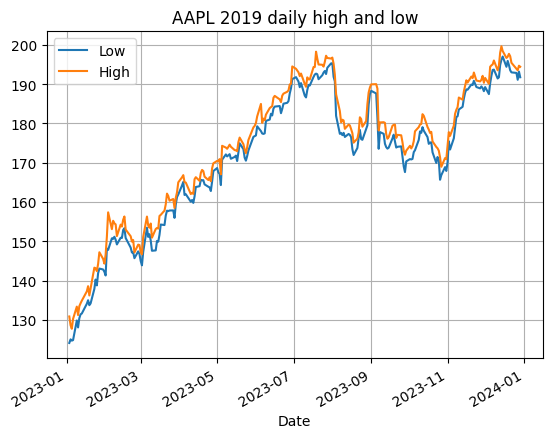

In [201]:
import datetime
# We select just 2019 dates
dates_2019=AAPL.index[(AAPL.index>="2023-01-01") & (AAPL.index<"2024-01-01")]
#We slice the dataframe
AAPL_high_low=AAPL.loc[dates_2019,['Low','High']]
print(type(AAPL_high_low))
#Plot the data
AAPL_high_low.plot(grid=True,title='AAPL 2019 daily high and low')

## **Remark**: The reason why we use datetime objects is because the index is also a datetime object, which is the default index in yfinance. However, if dates are represented as strings, once use string comparison (see below) since dates follow lexicographic ordering, which is the default comparison straegy for strings

In [202]:
date="2022-02-02"

print(date>"2023-02-02")

print(date>"2021-01-01")

False
True


In [203]:
string_index=AAPL.index.astype(str)#cast datetime to string
string_index

Index(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
       '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       ...
       '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21', '2025-10-22',
       '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29'],
      dtype='object', name='Date', length=1255)

In [204]:
string_index>"2023-01-01"# we can use string comparisson

array([False, False, False, ...,  True,  True,  True], shape=(1255,))

### It doesn't really matter which date representation you use (either python datetime or string), **but be aware of the difference!!!**
---

# Some useful functions for financial applications: Diff, Shift and pct_change()
### ```dataframe.diff(n)``` computes the difference with respect to the tow n postitions below. Shift ```dataframe.shift(n)``` displaces the dataframe $n$ rows down. ```dataframe.pct_change()``` computes returns

In [205]:
AAPL

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-10-30,0.000000,108.860001,111.989998,107.720001,111.059998,190272600.0,4.690063
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0,4.689236
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,4.704472
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0,4.744497
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0,4.779376
...,...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0,5.559065
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0,5.571469
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0,5.594005


In [206]:
AAPL.Close.diff(1)

Date
2020-10-30         NaN
2020-11-02   -0.090004
2020-11-03    1.670006
2020-11-04    4.509995
2020-11-05    4.080002
                ...   
2025-10-23    1.129974
2025-10-24    3.240021
2025-10-27    5.989990
2025-10-28    0.190002
2025-10-29    0.700012
Name: Close, Length: 1255, dtype: float64

In [207]:
AAPL.Close.shift(1)

Date
2020-10-30           NaN
2020-11-02    108.860001
2020-11-03    108.769997
2020-11-04    110.440002
2020-11-05    114.949997
                 ...    
2025-10-23    258.450012
2025-10-24    259.579987
2025-10-27    262.820007
2025-10-28    268.809998
2025-10-29    269.000000
Name: Close, Length: 1255, dtype: float64

In [208]:
AAPL['daily_return'] = AAPL["Close"].pct_change()

In [209]:
AAPL.head()

,Adj Close,Close,High,Low,Open,Volume,log_stock_close,daily_return
Date,,,,,,,,
2020-10-30,0.000000,108.860001,111.989998,107.720001,111.059998,190272600.0,4.690063,NaN
2020-11-02,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0,4.689236,-0.000827
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,4.704472,0.015354
2020-11-04,111.813896,114.949997,115.589996,112.349998,114.139999,138235500.0,4.744497,0.040837
2020-11-05,115.782616,119.029999,119.620003,116.870003,117.949997,126387100.0,4.779376,0.035494


----
# Iterating over Dataframe rows
### Sometime our analysis requires to go row by row in a dataframe to perform a numerical operation. To do this we can use ```iterrows``` or ```itertuples``` . ```iterrows``` returns a (index,row) tuple whereas ```itertuples``` returns a objects whose index attribute gives the index and the rest of the atributes follow the column names

In [210]:
import time
high_low_mid=np.zeros(len(AAPL))
i=0
start_time=time.time()
for index,row in AAPL.iterrows():
    high_low_mid[i]=0.5*(row.High+row.Low)
    i+=1
print("iterrows took", time.time()-start_time,"seconds")

iterrows took 0.03238081932067871 seconds


In [211]:
print(high_low_mid)

[109.85499954 109.         110.11000061 ... 266.88499451 269.02000427
 269.25999451]


In [212]:
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.itertuples():    
    high_low_mid[index]=0.5*(row.High+row.Low)
    index+=1
print("itertuples took", time.time()-start_time,"seconds")

itertuples took 0.003989219665527344 seconds


In [213]:
print(high_low_mid)

[109.85499954 109.         110.11000061 ... 266.88499451 269.02000427
 269.25999451]


### **Note:** If going row by row is necessary (as we will see in a minute, vectorisation is always preferred), most of the time `itertuples` is much more efficient 
---

# Vectorisation in DataFrame Columns and slices
### As mentioned in the beginning of the session, internally Pandas stores the data as numpy arrays. Hence, we can make use of vectorisation to speed up computations

In [214]:
%timeit high_low_mid=0.5*(AAPL.High+AAPL.Low)

81.6 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [215]:
high_low_mid=0.5*(AAPL.High+AAPL.Low)
high_low_mid.values

array([109.85499954, 109.        , 110.11000061, ..., 266.88499451,
       269.02000427, 269.25999451], shape=(1255,))

In [216]:
#We can apply the same pinciple if we want a slice corresponding to 2019 data

dates_2019=AAPL.index[(AAPL.index>="2019-01-01") & (AAPL.index<"2020-01-01")]

%timeit high_low_mid_2019=0.5*(AAPL.High[dates_2019]+AAPL.Low[dates_2019])# gives some performance improvement

%timeit high_low_mid_2019=0.5*(AAPL.loc[dates_2019,'High']+AAPL.loc[dates_2019,'Low'])



321 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
356 µs ± 5.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---
# Complex functions and  ```apply```
### Using ```dataframe.apply``` we can vectorise any user-defined function that supports vectorisation and apply it indexwise (axis=1) or columnwise (axis=0). One can further optimize the method by setting ```raw=True``` which will make the assumption that objects are numpy arrays internally

In [217]:
AAPL=AAPL.loc[:,['Open','High','Low','Close']]

In [219]:
# Columnwuse
def my_func(x):
    # Function will be applied columnwise x represents the entire column
    return x.max() -x.min() 

%timeit AAPL.apply(my_func,axis=0,raw=False)
%timeit AAPL.apply(my_func,axis=0,raw=True)

AAPL.apply(my_func,axis=0,raw=True)# For each column do maximum -minimum value
    

318 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
80.5 µs ± 624 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Open     160.169998
High     160.730003
Low      160.829994
Close    160.930016
dtype: float64

In [220]:
def my_func_high_low_mid(x):
    
     # Function will be applied rowise, x the entire 
    return 0.5*(x.High+x.Low) #here we assume x mantains the column structure

def my_func_high_low_mid2(x):
    # Function will be applied rowise, x the entire row casted to numpy array
    return 0.5*(x[1]+x[2]) # We need to use integer slicing

%timeit AAPL.apply(my_func_high_low_mid,axis=1,raw=False)
%timeit AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

10.2 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.8 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [111]:
AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

Date
1980-12-12 00:00:00+00:00      0.128627
1980-12-15 00:00:00+00:00      0.121931
1980-12-16 00:00:00+00:00      0.113002
1980-12-17 00:00:00+00:00      0.115792
1980-12-18 00:00:00+00:00      0.119141
                                ...    
2024-10-23 00:00:00+00:00    232.949997
2024-10-24 00:00:00+00:00    230.695007
2024-10-25 00:00:00+00:00    232.315002
2024-10-28 00:00:00+00:00    234.064995
2024-10-29 00:00:00+00:00    234.045006
Length: 11062, dtype: float64

### As you can see ```raw=True``` can give dramatic performance improvements as data will be treated as a numpy array

# Rolling windows

### In time-series it is useful to apply a function on observation windows of size $n$. We can do so using ```dataframe.rolling(n)```. The this is followed by the function we want to apply to each rolling window; tipycal choices are ```mean,std,min,max```. For more details and additional arguments see (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)


In [221]:
# Lets compute the 10 day moving average
AAPL.Close.rolling(10).mean()

Date
2020-10-30           NaN
2020-11-02           NaN
2020-11-03           NaN
2020-11-04           NaN
2020-11-05           NaN
                 ...    
2025-10-23    253.281998
2025-10-24    255.036998
2025-10-27    257.151997
2025-10-28    259.274997
2025-10-29    261.310999
Name: Close, Length: 1255, dtype: float64

In [222]:
# Lets compute the 10 day rolling minimum
AAPL.Close.rolling(10).min()

Date
2020-10-30           NaN
2020-11-02           NaN
2020-11-03           NaN
2020-11-04           NaN
2020-11-05           NaN
                 ...    
2025-10-23    245.270004
2025-10-24    247.449997
2025-10-27    247.449997
2025-10-28    247.449997
2025-10-29    247.449997
Name: Close, Length: 1255, dtype: float64

In [223]:
# Lets compute the 10 day rolling std
AAPL.Close.rolling(10).std()

Date
2020-10-30         NaN
2020-11-02         NaN
2020-11-03         NaN
2020-11-04         NaN
2020-11-05         NaN
                ...   
2025-10-23    6.777063
2025-10-24    6.744039
2025-10-27    7.452679
2025-10-28    7.506767
2025-10-29    7.270088
Name: Close, Length: 1255, dtype: float64

# Join/Merge/Concatenate dataframes and series

## 1 Join and Merge

### Now that we have a clear view on basic data manipulation, we can ask ourselves how can we merge data from different Stocks?

In [229]:
list_of_symbols=['aapl','amzn','dis','msft','spy']

dict_of_df={}
for symbol in list_of_symbols:
    aux=yfinance.download([symbol],auto_adjust=False,period="5Y") 
    dict_of_df[symbol]=pd.DataFrame(aux.values,index=aux.index,columns=aux.columns.get_level_values('Price').values)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [231]:
dict_of_df['amzn']

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,151.807495,151.807495,158.350006,150.949997,157.887497,167728000.0
2020-11-02,150.223999,150.223999,153.985504,147.505997,153.087006,145148000.0
2020-11-03,152.420502,152.420502,153.744995,149.048996,150.926498,97958000.0
2020-11-04,162.057999,162.057999,162.242493,156.986496,157.999496,136780000.0
2020-11-05,166.100006,166.100006,168.339996,164.444000,165.998505,115786000.0
...,...,...,...,...,...,...
2025-10-23,221.089996,221.089996,221.300003,218.179993,219.000000,31540000.0
2025-10-24,224.210007,224.210007,225.399994,221.899994,221.970001,38685100.0
2025-10-27,226.970001,226.970001,228.399994,225.539993,227.660004,38267000.0


In [232]:
dict_of_df['aapl']

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890053,108.860001,111.989998,107.720001,111.059998,190272600.0
2020-11-02,105.802513,108.769997,110.680000,107.320000,109.110001,122866900.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0
2020-11-04,111.813911,114.949997,115.589996,112.349998,114.139999,138235500.0
2020-11-05,115.782585,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
2025-10-23,259.579987,259.579987,260.619995,258.010010,259.940002,32754900.0
2025-10-24,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0
2025-10-27,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0


### We can merge two dataframes by index using ```merge```. By setting ```how='inner'``` we make sure that only intersecting indices will be selected and likewise setting ```left_index=True```, ```right_index=True``` we make sure that both indices are being considered 

In [233]:
%timeit merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))

369 µs ± 7.87 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [234]:
merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))
merged_df1.head()

,Adj Close_aapl,Close_aapl,High_aapl,Low_aapl,Open_aapl,Volume_aapl,Adj Close_amzn,Close_amzn,High_amzn,Low_amzn,Open_amzn,Volume_amzn
Date,,,,,,,,,,,,
2020-10-30,105.890053,108.860001,111.989998,107.720001,111.059998,190272600.0,151.807495,151.807495,158.350006,150.949997,157.887497,167728000.0
2020-11-02,105.802513,108.769997,110.680000,107.320000,109.110001,122866900.0,150.223999,150.223999,153.985504,147.505997,153.087006,145148000.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,152.420502,152.420502,153.744995,149.048996,150.926498,97958000.0
2020-11-04,111.813911,114.949997,115.589996,112.349998,114.139999,138235500.0,162.057999,162.057999,162.242493,156.986496,157.999496,136780000.0
2020-11-05,115.782585,119.029999,119.620003,116.870003,117.949997,126387100.0,166.100006,166.100006,168.339996,164.444000,165.998505,115786000.0


### Likewise we can perform the same operation using  ```join```

In [235]:
%timeit merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amzn')

366 µs ± 7.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [236]:
merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amz')
merged_df2.head()

,Adj Close_aapl,Close_aapl,High_aapl,Low_aapl,Open_aapl,Volume_aapl,Adj Close_amz,Close_amz,High_amz,Low_amz,Open_amz,Volume_amz
Date,,,,,,,,,,,,
2020-10-30,105.890053,108.860001,111.989998,107.720001,111.059998,190272600.0,151.807495,151.807495,158.350006,150.949997,157.887497,167728000.0
2020-11-02,105.802513,108.769997,110.680000,107.320000,109.110001,122866900.0,150.223999,150.223999,153.985504,147.505997,153.087006,145148000.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0,152.420502,152.420502,153.744995,149.048996,150.926498,97958000.0
2020-11-04,111.813911,114.949997,115.589996,112.349998,114.139999,138235500.0,162.057999,162.057999,162.242493,156.986496,157.999496,136780000.0
2020-11-05,115.782585,119.029999,119.620003,116.870003,117.949997,126387100.0,166.100006,166.100006,168.339996,164.444000,165.998505,115786000.0


### ***Remark***: the difference between ```merge``` and ```join``` is that ```merge``` allows for more flexibility allowing to merge by column values as well. In general, merge performance tends to be better at the cost of providing more arguments

## 2. Adding rows to an existing dataframe
### ```pd.concat``` allows to add additional rows to an existing dataframe

In [237]:
dataframe=pd.DataFrame({"Open": 100,"High": 100,"Low": 100,"Close": 100 },index=[0])
print(dataframe)
AAPL=pd.concat([AAPL,dataframe],ignore_index=True)

   Open  High  Low  Close
0   100   100  100    100


In [238]:
AAPL

,Adj Close,Close,High,Low,Open,Volume
0,105.890068,108.860001,111.989998,107.720001,111.059998,190272600.0
1,105.802498,108.769997,110.680000,107.320000,109.110001,122866900.0
2,107.426956,110.440002,111.489998,108.730003,109.660004,107624400.0
3,111.813904,114.949997,115.589996,112.349998,114.139999,138235500.0
4,115.782578,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
1251,262.820007,262.820007,264.130005,259.179993,261.190002,38253700.0
1252,268.809998,268.809998,269.119995,264.649994,264.880005,44888200.0
1253,269.000000,269.000000,269.890015,268.149994,268.989990,41534800.0
1254,269.700012,269.700012,271.410004,267.109985,269.279999,50984000.0


In [239]:
pd.concat([dict_of_df['aapl'],dict_of_df['amzn']])

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,105.890053,108.860001,111.989998,107.720001,111.059998,190272600.0
2020-11-02,105.802513,108.769997,110.680000,107.320000,109.110001,122866900.0
2020-11-03,107.426971,110.440002,111.489998,108.730003,109.660004,107624400.0
2020-11-04,111.813911,114.949997,115.589996,112.349998,114.139999,138235500.0
2020-11-05,115.782585,119.029999,119.620003,116.870003,117.949997,126387100.0
...,...,...,...,...,...,...
2025-10-23,221.089996,221.089996,221.300003,218.179993,219.000000,31540000.0
2025-10-24,224.210007,224.210007,225.399994,221.899994,221.970001,38685100.0
2025-10-27,226.970001,226.970001,228.399994,225.539993,227.660004,38267000.0


## 3. Concat dictionaries and Multi_indexing
### Concatenate allows to merge multiple df at once, but will create a multi-index/multi-column data frame

In [240]:
df1=pd.concat(dict_of_df,axis=1)
df1

aapl                                                  \
             Adj Close       Close        High         Low        Open   
Date                                                                     
2020-10-30  105.890053  108.860001  111.989998  107.720001  111.059998   
2020-11-02  105.802513  108.769997  110.680000  107.320000  109.110001   
2020-11-03  107.426971  110.440002  111.489998  108.730003  109.660004   
2020-11-04  111.813911  114.949997  115.589996  112.349998  114.139999   
2020-11-05  115.782585  119.029999  119.620003  116.870003  117.949997   
...                ...         ...         ...         ...         ...   
2025-10-23  259.579987  259.579987  260.619995  258.010010  259.940002   
2025-10-24  262.820007  262.820007  264.130005  259.179993  261.190002   
2025-10-27  268.809998  268.809998  269.119995  264.649994  264.880005   
2025-10-28  269.000000  269.000000  269.890015  268.149994  268.989990   
2025-10-29  269.700012  269.700012  271.410004  267.109985  269.279999   

                               amzn                                      ...  \
                 Volume   Adj Close       Close        High         Low  ...   
Date                                                                     ...   
2020-10-30  190272600.0  151.807495  151.807495  158.350006  150.949997  ...   
2020-11-02  122866900.0  150.223999  150.223999  153.985504  147.505997  ...   
2020-11-03  107624400.0  152.420502  152.420502  153.744995  149.048996  ...   
2020-11-04  138235500.0  162.057999  162.057999  162.242493  156.986496  ...   
2020-11-05  126387100.0  166.100006  166.100006  168.339996  164.444000  ...   
...                 ...         ...         ...         ...         ...  ...   
2025-10-23   32754900.0  221.089996  221.089996  221.300003  218.179993  ...   
2025-10-24   38253700.0  224.210007  224.210007  225.399994  221.899994  ...   
2025-10-27   44888200.0  226.970001  226.970001  228.399994  225.539993  ...   
2025-10-28   41534800.0  229.250000  229.250000  231.490005  226.210007  ...   
2025-10-29   50984000.0  230.300003  230.300003  232.820007  227.759995  ...   

                  msft                                             spy  \
                  High         Low        Open      Volume   Adj Close   
Date                                                                     
2020-10-30  204.289993  199.619995  203.500000  36953700.0  304.420471   
2020-11-02  205.279999  200.119995  204.289993  30842200.0  307.832581   
2020-11-03  208.119995  203.119995  203.889999  27512000.0  313.267548   
2020-11-04  218.320007  212.419998  214.020004  42311800.0  320.268890   
2020-11-05  224.119995  221.149994  222.039993  36080100.0  326.514984   
...                ...         ...         ...         ...         ...   
2025-10-23  523.950012  518.609985  522.460022  14023500.0  671.760010   
2025-10-24  525.349976  520.710022  522.789978  15532400.0  677.250000   
2025-10-27  534.580017  529.010010  531.780029  18734700.0  685.239990   
2025-10-28  553.719971  540.770020  550.000000  29986700.0  687.059998   
2025-10-29  546.270020  536.729980  544.940002  35368400.0  687.390015   

                                                                         
                 Close        High         Low        Open       Volume  
Date                                                                     
2020-10-30  326.540009  329.690002  322.600006  328.279999  120287300.0  
2020-11-02  330.200012  332.359985  327.239990  330.200012   86068300.0  
2020-11-03  336.029999  338.250000  330.290009  333.690002   93294200.0  
2020-11-04  343.540009  347.940002  339.589996  340.859985  126959700.0  
2020-11-05  350.239990  352.190002  348.859985  349.239990   82039700.0  
...                ...         ...         ...         ...          ...  
2025-10-23  671.760010  672.710022  667.799988  668.119995   65604500.0  
2025-10-24  677.250000  678.469971  675.650024  676.460022   74356500.0  
2025-10-2

In [241]:
df2=pd.concat(dict_of_df,axis=0)
df2

Adj Close       Close        High         Low        Open  \
     Date                                                                     
aapl 2020-10-30  105.890053  108.860001  111.989998  107.720001  111.059998   
     2020-11-02  105.802513  108.769997  110.680000  107.320000  109.110001   
     2020-11-03  107.426971  110.440002  111.489998  108.730003  109.660004   
     2020-11-04  111.813911  114.949997  115.589996  112.349998  114.139999   
     2020-11-05  115.782585  119.029999  119.620003  116.870003  117.949997   
...                     ...         ...         ...         ...         ...   
spy  2025-10-23  671.760010  671.760010  672.710022  667.799988  668.119995   
     2025-10-24  677.250000  677.250000  678.469971  675.650024  676.460022   
     2025-10-27  685.239990  685.239990  685.539978  682.119995  682.729980   
     2025-10-28  687.059998  687.059998  688.909973  684.830017  687.049988   
     2025-10-29  687.390015  687.390015  689.700012  682.869995  688.719971   

                      Volume  
     Date                     
aapl 2020-10-30  190272600.0  
     2020-11-02  122866900.0  
     2020-11-03  107624400.0  
     2020-11-04  138235500.0  
     2020-11-05  126387100.0  
...                      ...  
spy  2025-10-23   65604500.0  
     2025-10-24   74356500.0  
     2025-10-27   63339800.0  
     2025-10-28   61738100.0  
     2025-10-29   85657100.0  

[6275 rows x 6 columns]

### This introduces multi_indexing e.g. indices or columns that are 2D arrays or in general n dimensional arrays

In [242]:
df1.columns

MultiIndex([('aapl', 'Adj Close'),
            ('aapl',     'Close'),
            ('aapl',      'High'),
            ('aapl',       'Low'),
            ('aapl',      'Open'),
            ('aapl',    'Volume'),
            ('amzn', 'Adj Close'),
            ('amzn',     'Close'),
            ('amzn',      'High'),
            ('amzn',       'Low'),
            ('amzn',      'Open'),
            ('amzn',    'Volume'),
            ( 'dis', 'Adj Close'),
            ( 'dis',     'Close'),
            ( 'dis',      'High'),
            ( 'dis',       'Low'),
            ( 'dis',      'Open'),
            ( 'dis',    'Volume'),
            ('msft', 'Adj Close'),
            ('msft',     'Close'),
            ('msft',      'High'),
            ('msft',       'Low'),
            ('msft',      'Open'),
            ('msft',    'Volume'),
            ( 'spy', 'Adj Close'),
            ( 'spy',     'Close'),
            ( 'spy',      'High'),
            ( 'spy',       'Low'),
            ( 'spy',

### The good news is that we can efficiently use slicing with  ```loc```, see examples below

In [244]:
df1.loc[:,('msft','Close')]#retrieve all rows for msft and close

Date
2020-10-30    202.470001
2020-11-02    202.330002
2020-11-03    206.429993
2020-11-04    216.389999
2020-11-05    223.289993
                 ...    
2025-10-23    520.559998
2025-10-24    523.609985
2025-10-27    531.520020
2025-10-28    542.070007
2025-10-29    541.549988
Name: (msft, Close), Length: 1255, dtype: float64

In [245]:
df1.loc[:,('msft')]#retrieve all rows and columns for msft and close

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-10-30,194.133377,202.470001,204.289993,199.619995,203.500000,36953700.0
2020-11-02,193.999161,202.330002,205.279999,200.119995,204.289993,30842200.0
2020-11-03,197.930359,206.429993,208.119995,203.119995,203.889999,27512000.0
2020-11-04,207.480209,216.389999,218.320007,212.419998,214.020004,42311800.0
2020-11-05,214.096130,223.289993,224.119995,221.149994,222.039993,36080100.0
...,...,...,...,...,...,...
2025-10-23,520.559998,520.559998,523.950012,518.609985,522.460022,14023500.0
2025-10-24,523.609985,523.609985,525.349976,520.710022,522.789978,15532400.0
2025-10-27,531.520020,531.520020,534.580017,529.010010,531.780029,18734700.0


### If we want to select all elements at a given index level, we can use ```slice(None)``` at that level instead of the more intuitive ```:``` that we are used to

In [249]:
df1.loc[:,(slice(None),"Close")]

,aapl,amzn,dis,msft,spy
,Close,Close,Close,Close,Close
Date,,,,,
2020-10-30,108.860001,151.807495,121.250000,202.470001,326.540009
2020-11-02,108.769997,150.223999,120.129997,202.330002,330.200012
2020-11-03,110.440002,152.420502,124.019997,206.429993,336.029999
2020-11-04,114.949997,162.057999,125.070000,216.389999,343.540009
2020-11-05,119.029999,166.100006,126.959999,223.289993,350.239990
...,...,...,...,...,...
2025-10-23,259.579987,221.089996,113.029999,520.559998,671.760010
2025-10-24,262.820007,224.210007,111.680000,523.609985,677.250000


### This way we can nicely obtain all close time series for many symbols

In [254]:
df1.loc[:,(slice(None),"Close")].index

DatetimeIndex(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12',
               ...
               '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21',
               '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-27',
               '2025-10-28', '2025-10-29'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

---
# Creating a Multi-Index and performing Groupby operations


### Groupby allows to index data using different columns or compute summary statistics for groups wihin the data. Let's look at some option data


In [255]:
import numpy as np
import pandas as pd

In [257]:
option_data=pd.read_csv('AMZN_options.csv')
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD,2020-11-06,C
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD,2020-11-06,C
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,AMZN230120P03600000,2020-10-28 16:43:01,3600.0,980.00,1061.70,1078.45,0.00000,0.000000,1.0,2.0,0.375985,True,REGULAR,USD,2023-01-20,P
6033,AMZN230120P03900000,2020-09-30 15:21:16,3900.0,1166.30,1227.55,1245.00,0.00000,0.000000,1.0,0.0,0.340918,True,REGULAR,USD,2023-01-20,P
6034,AMZN230120P04000000,2020-10-21 13:47:58,4000.0,1247.25,1359.95,1376.50,0.00000,0.000000,55.0,59.0,0.371846,True,REGULAR,USD,2023-01-20,P
6035,AMZN230120P04800000,2020-10-14 19:58:31,4800.0,1795.00,2017.40,2033.00,0.00000,0.000000,5.0,4.0,0.363714,True,REGULAR,USD,2023-01-20,P


### This dataframe contains multiple option data. As you may already now each option is uniquely defined by "expiration_date" and "option_type". We can create a custom multi-index in our dataframe by using the ```dataframe.set_index(["column1","column2",...])```

In [258]:
indexed_option_data=option_data.set_index(["expiration_date","option_type"])
indexed_option_data

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
2023-01-20      P            AMZN230120P03600000  2020-10-28 16:43:01  3600.0   
                P            AMZN230120P03900000  2020-09-30 15:21:16  3900.0   
                P            AMZN230120P04000000  2020-10-21 13:47:58  4000.0   
                P            AMZN230120P04800000  2020-10-14 19:58:31  4800.0   
                P            AMZN230120P05000000  2020-10-22 18:55:34  5000.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
2023-01-20      P               980.00  1061.70  1078.45   0.00000   
                P              1166.30  1227.55  1245.00   0.00000   
                P              1247.25  1359.95  1376.50   0.00000   
                P              1795.00  2017.40  2033.00   0.00000   
                P              2051.20  2193.50  2203.00   0.00000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
2023-01-20      P                 0.000000     1.0           2.0   
                P                 0.000000     1.0           0.0   
                P                 0.000000    55.0          59.0   
                P                 0.000000     5.0           4.0   
                P                 0.000000     1.0           1.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
2023-01-20      P                     0.375985        True      REGULAR   
                P                     0.340918        True      REGULAR   
                P                     0.371846        True      REGULAR   
                P                     0.363714        True      REGULAR   
                P                     0.358921        True      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

In [259]:
indexed_option_data.loc[("2020-11-06",),:]##retrieve all options for a given expiration

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
option_type,,,,,,,,,,,,,,
C,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD
C,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD
C,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P,AMZN201106P04550000,2020-11-02 15:27:12,4550.0,1540.00,1587.50,1591.95,246.44995,19.052217,1.0,1.0,2.030950,True,REGULAR,USD
P,AMZN201106P04650000,2020-10-30 15:11:44,4650.0,1565.65,1686.55,1691.95,0.00000,0.000000,1.0,0.0,2.097234,True,REGULAR,USD
P,AMZN201106P04700000,2020-10-30 17:11:39,4700.0,1661.40,1737.35,1742.15,0.00000,0.000000,4.0,2.0,2.151738,True,REGULAR,USD


In [260]:
indexed_option_data.loc[("2020-11-06","C"),:]#retrieve all Call options for a given expiration

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
                C            AMZN201106C04650000  2020-11-02 15:54:50  4650.0   
                C            AMZN201106C04700000  2020-10-30 19:55:10  4700.0   
                C            AMZN201106C04750000  2020-11-02 17:32:06  4750.0   
                C            AMZN201106C04800000  2020-10-30 18:56:49  4800.0   
                C            AMZN201106C04850000  2020-11-02 19:06:05  4850.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
                C                 0.01     0.00     0.08   0.00000   
                C                 0.04     0.00     0.03   0.00000   
                C                 0.01     0.00     0.04  -0.04000   
                C                 0.01     0.00     0.01  -0.04000   
                C                 0.01     0.00     0.01  -0.02000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
                C                 0.000000     2.0         239.0   
                C                 0.000000    64.0         121.0   
                C               -79.999990     6.0          73.0   
                C               -79.999990     2.0         229.0   
                C               -66.666670   398.0         433.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
                C                     1.121098       False      REGULAR   
                C                     1.070317       False      REGULAR   
                C                     1.117192       False      REGULAR   
                C                     1.046880       False      REGULAR   
                C                     1.062505       False      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

### We can use the ```groupby``` method to apply a function such as mean,std,min,max to our data grouped in a particular way ```dataframe.groupby([column1,column2,...]).function()```, where the function operations are applied columnwise

### Note that groupby tipically returns a multi-index dataframe

In [261]:
option_data.groupby(["expiration_date","option_type"]).max() #gives the maximum value for each expiration/option_type combination

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201106P04850000  2020-11-02 19:11:17  4850.0   
2020-11-13      C            AMZN201113C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201113P04650000  2020-11-02 19:11:15  4650.0   
2020-11-20      C            AMZN201120C05300000  2020-11-02 19:10:24  5300.0   
                P            AMZN201120P05300000  2020-11-02 19:10:56  5300.0   
2020-11-27      C            AMZN201127C04850000  2020-11-02 19:10:50  4850.0   
                P            AMZN201127P04550000  2020-11-02 19:10:56  4550.0   
2020-12-04      C            AMZN201204C03800000  2020-11-02 19:09:31  3800.0   
                P            AMZN201204P03440000  2020-11-02 19:06:10  3440.0   
2020-12-11      C            AMZN201211C03300000  2020-11-02 19:06:56  3300.0   
                P            AMZN201211P03300000  2020-11-02 19:06:01  3300.0   
2020-12-18      C            AMZN201218C05300000  2020-11-02 19:09:59  5300.0   
                P            AMZN201218P05300000  2020-11-02 19:10:15  5300.0   
2021-01-15      C            AMZN210115C05300000  2020-11-02 19:09:43  5300.0   
                P            AMZN210115P05300000  2020-11-02 19:09:28  5300.0   
2021-02-19      C            AMZN210219C05300000  2020-11-02 19:09:55  5300.0   
                P            AMZN210219P05000000  2020-11-02 19:09:25  5000.0   
2021-03-19      C            AMZN210319C05300000  2020-11-02 19:07:23  5300.0   
                P            AMZN210319P05200000  2020-11-02 19:10:45  5200.0   
2021-04-16      C            AMZN210416C05300000  2020-11-02 18:59:31  5300.0   
                P            AMZN210416P05300000  2020-11-02 19:06:10  5300.0   
2021-06-18      C            AMZN210618C05300000  2020-11-02 19:10:53  5300.0   
                P            AMZN210618P05250000  2020-11-02 19:10:24  5250.0   
2021-07-16      C            AMZN210716C05300000  2020-11-02 18:54:24  5300.0   
                P            AMZN210716P05200000  2020-11-02 18:53:52  5200.0   
2021-08-20      C            AMZN210820C05300000  2020-11-02 19:09:31  5300.0   
                P            AMZN210820P05250000  2020-11-02 18:53:18  5250.0   
2021-09-17      C            AMZN210917C05100000  2020-11-02 19:08:53  5100.0   
                P            AMZN210917P04250000  2020-11-02 19:08:53  4250.0   
2021-10-15      C            AMZN211015C05000000  2020-11-02 19:02:59  5000.0   
                P            AMZN211015P03500000  2020-11-02 18:50:10  3500.0   
2022-01-21      C            AMZN220121C05300000  2020-11-02 19:10:30  5300.0   
                P            AMZN220121P05300000  2020-11-02 19:07:17  5300.0   
2022-06-17      C            AMZN220617C05300000  2020-11-02 19:04:09  5300.0   
                P            AMZN220617P05000000  2020-11-02 16:59:03  5000.0   
2023-01-20      C            AMZN230120C05100000  2020-11-02 19:10:39  5100.0   
                P            AMZN230120P05000000  2020-11-02 19:08:37  5000.0   

                             lastPrice      bid      ask      change  \
expiration_date option_type                                            
2020-11-06      C              1202.70  1139.35  1143.20   42.630005   
                P              1808.05  1887.65  1891.85  246.449950   
2020-11-13      C              1342.65  1068.65  1074.90   22.070007   
                P              1554.05  1684.90  1693.05  191.490020   
2020-11-20      C              1890.27  1759.05  1763.30   15.250000   
                P              2200.95  2342.50  2346.65  381.300050   
2020-11-27      C              1316.60  1096.70  1101.90    6.730003   
                P              1394.30  1590.10  1597.65  105.500000   
2020-12-04      C               957.51   761.60   770.75    0.000000   
 

In [262]:
grouped_option_chain=option_data.groupby(["expiration_date","option_type","strike"]).sum()

In [263]:
grouped_option_chain

contractSymbol        lastTradeDate  \
expiration_date option_type strike                                             
2020-11-06      C           1820.0  AMZN201106C01820000  2020-11-02 18:28:21   
                            1830.0  AMZN201106C01830000  2020-11-02 18:28:21   
                            1840.0  AMZN201106C01840000  2020-11-02 18:28:21   
                            1850.0  AMZN201106C01850000  2020-11-02 18:28:21   
                            1870.0  AMZN201106C01870000  2020-11-02 14:34:36   
...                                                 ...                  ...   
2023-01-20      P           3600.0  AMZN230120P03600000  2020-10-28 16:43:01   
                            3900.0  AMZN230120P03900000  2020-09-30 15:21:16   
                            4000.0  AMZN230120P04000000  2020-10-21 13:47:58   
                            4800.0  AMZN230120P04800000  2020-10-14 19:58:31   
                            5000.0  AMZN230120P05000000  2020-10-22 18:55:34   

                                    lastPrice      bid      ask    change  \
expiration_date option_type strike                                          
2020-11-06      C           1820.0    1148.70  1139.35  1143.20 -62.51001   
                            1830.0    1146.25  1123.35  1127.75 -56.18994   
                            1840.0    1128.45  1116.55  1120.70 -62.75000   
                            1850.0    1126.00  1108.85  1112.60 -56.47998   
                            1870.0    1201.10  1086.10  1092.25 -17.23999   
...                                       ...      ...      ...       ...   
2023-01-20      P           3600.0     980.00  1061.70  1078.45   0.00000   
                            3900.0    1166.30  1227.55  1245.00   0.00000   
                            4000.0    1247.25  1359.95  1376.50   0.00000   
                            4800.0    1795.00  2017.40  2033.00   0.00000   
                            5000.0    2051.20  2193.50  2203.00   0.00000   

                                    percentChange  volume  openInterest  \
expiration_date option_type strike                                        
2020-11-06      C           1820.0      -5.160956    15.0           4.0   
                            1830.0      -4.672994     1.0           2.0   
                            1840.0      -5.267798     1.0           2.0   
                            1850.0      -4.776401     1.0           3.0   
                            1870.0      -1.415039     2.0           2.0   
...                                           ...     ...           ...   
2023-01-20      P           3600.0       0.000000     1.0           2.0   
                            3900.0       0.000000     1.0           0.0   
                            4000.0       0.000000    55.0          59.0   
                            4800.0       0.000000     5.0           4.0   
                            5000.0       0.000000     1.0           1.0   

                                    impliedVolatility  inTheMoney  \
expiration_date option_type strike                                  
2020-11-06      C           1820.0           0.000010           1   
                            1830.0           0.000010           1   
                            1840.0           0.000010           1   
                            1850.0           0.000010           1   
                            1870.0           0.000010           1   
...                                               ...         ...   
2023-01-20      P           3600.0           0.375985           1   
                            3900.0           0.340918           1   
                            4000.0           0.371846           1   
                            4800.0           0.363714           1   
                            5000.0           0.358921           1   

                                   contractSize currency  
expiration_date option_type strike                        
2020-1

In [264]:
grouped_option_chain.loc[('2020-11-06','C'),:]

,contractSymbol,lastTradeDate,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
strike,,,,,,,,,,,,,
1820.0,AMZN201106C01820000,2020-11-02 18:28:21,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,1,REGULAR,USD
1830.0,AMZN201106C01830000,2020-11-02 18:28:21,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,1,REGULAR,USD
1840.0,AMZN201106C01840000,2020-11-02 18:28:21,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,1,REGULAR,USD
1850.0,AMZN201106C01850000,2020-11-02 18:28:21,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,1,REGULAR,USD
1870.0,AMZN201106C01870000,2020-11-02 14:34:36,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,1,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650.0,AMZN201106C04650000,2020-11-02 15:54:50,0.01,0.00,0.08,0.00000,0.000000,2.0,239.0,1.121098,0,REGULAR,USD
4700.0,AMZN201106C04700000,2020-10-30 19:55:10,0.04,0.00,0.03,0.00000,0.000000,64.0,121.0,1.070317,0,REGULAR,USD
4750.0,AMZN201106C04750000,2020-11-02 17:32:06,0.01,0.00,0.04,-0.04000,-79.999990,6.0,73.0,1.117192,0,REGULAR,USD


# Some quick and **non-examinable** final remarks on ```dropna``` and ```interpolate```


In [265]:
### Let's introduce some missing values and see how we can remove or interpolate values

In [266]:
AAPL_copy=AAPL.iloc[:,:-1]
AAPL_copy.iloc[2,:]=np.nan
AAPL_copy.head()

,Adj Close,Close,High,Low,Open
0,105.890068,108.860001,111.989998,107.720001,111.059998
1,105.802498,108.769997,110.680000,107.320000,109.110001
2,NaN,NaN,NaN,NaN,NaN
3,111.813904,114.949997,115.589996,112.349998,114.139999
4,115.782578,119.029999,119.620003,116.870003,117.949997


In [267]:
# Dropna just removes the rows that contain a NaN
AAPL_copy.dropna(axis=0)
# We can also use axis=1 to drop columns

,Adj Close,Close,High,Low,Open
0,105.890068,108.860001,111.989998,107.720001,111.059998
1,105.802498,108.769997,110.680000,107.320000,109.110001
3,111.813904,114.949997,115.589996,112.349998,114.139999
4,115.782578,119.029999,119.620003,116.870003,117.949997
5,115.651054,118.690002,119.199997,116.129997,118.320000
...,...,...,...,...,...
1250,259.579987,259.579987,260.619995,258.010010,259.940002
1251,262.820007,262.820007,264.130005,259.179993,261.190002
1252,268.809998,268.809998,269.119995,264.649994,264.880005
1253,269.000000,269.000000,269.890015,268.149994,268.989990


In [268]:
AAPL_copy.interpolate(method='linear', axis=0)

,Adj Close,Close,High,Low,Open
0,105.890068,108.860001,111.989998,107.720001,111.059998
1,105.802498,108.769997,110.680000,107.320000,109.110001
2,108.808201,111.859997,113.134998,109.834999,111.625000
3,111.813904,114.949997,115.589996,112.349998,114.139999
4,115.782578,119.029999,119.620003,116.870003,117.949997
...,...,...,...,...,...
1251,262.820007,262.820007,264.130005,259.179993,261.190002
1252,268.809998,268.809998,269.119995,264.649994,264.880005
1253,269.000000,269.000000,269.890015,268.149994,268.989990
1254,269.700012,269.700012,271.410004,267.109985,269.279999


# Further reading for big data

### If you are dealing with big data is likely that pandas will consume all your memory, so other tools are preferred which use *lazy evaluation* like VAEX https://pypi.org/project/vaex/ or PySpark https://spark.apache.org/docs/latest/api/python/index.html 

### Lazy evaluation essentially means that a plan will be set to execute your operation, but it won't be actually executed until you need to retrieve a value. For instance creating a new column can be a lazy operation until we need to retrieve some value in that column.

### This approach allows to use multiprocessing to speed up calculations